In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('GDP.csv')
df.head()

,GDP,Year
0,37029883876,1960
1,39232435784,1961
2,42161481858,1962
3,48421923459,1963
4,56480289941,1964


In [3]:
df['Year'] = pd.to_datetime(df['Year'],format = '%Y')
df.head()

,GDP,Year
0,37029883876,1960-01-01
1,39232435784,1961-01-01
2,42161481858,1962-01-01
3,48421923459,1963-01-01
4,56480289941,1964-01-01


In [4]:
df.set_index('Year',inplace=True)
df.head()

,GDP
Year,
1960-01-01,37029883876
1961-01-01,39232435784
1962-01-01,42161481858
1963-01-01,48421923459
1964-01-01,56480289941


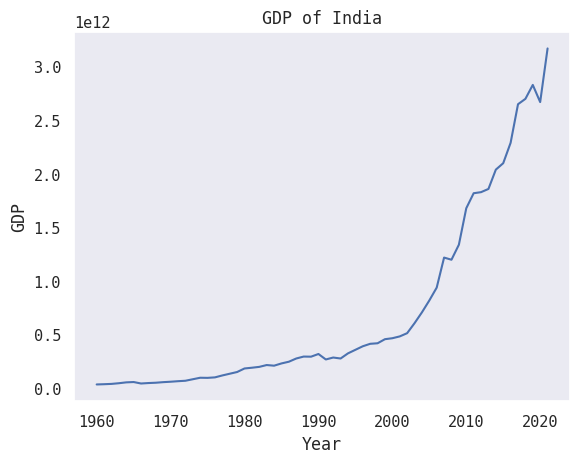

In [5]:
sns.set_theme(style = 'dark',font = 'monospace')
sns.lineplot(x = df.index,y=df['GDP']).set(title='GDP of India')
plt.savefig('GDP.png', dpi=300, bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

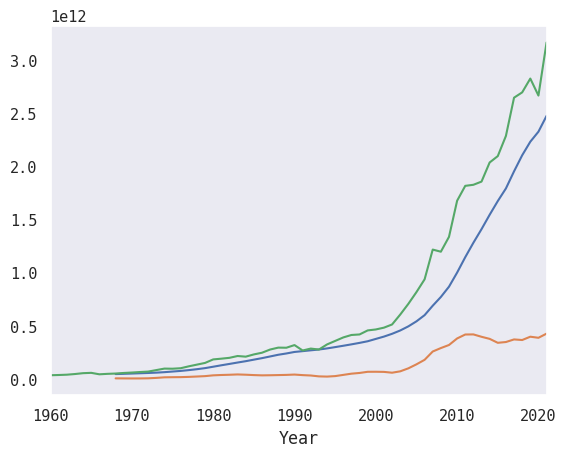

In [6]:
timeseries = df ['GDP']
timeseries.rolling(9).mean().plot(label='9 year Rolling Mean')
timeseries.rolling(9).std().plot(label='9 year Rolling Std')
timeseries.plot()
plt.legend

<Figure size 640x480 with 0 Axes>

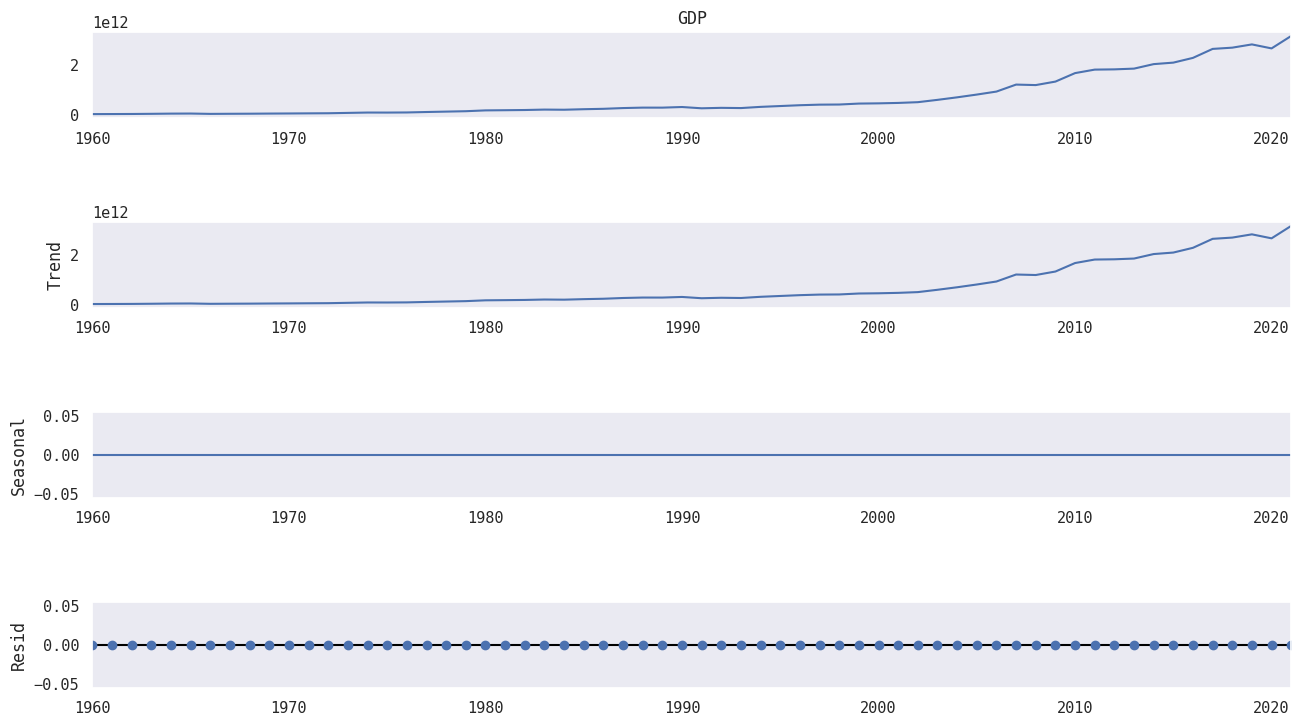

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['GDP'], period=1)
figure = plt.figure()
figure = decomposition.plot()
figure.set_size_inches(15, 8)

In [8]:
model = sm.tsa.statespace.SARIMAX(df['GDP'],order=(0,1,0), seasonal_order=(1,2,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary()) 

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61110D+01    |proj g|=  1.19644D-01

At iterate    5    f=  1.60649D+01    |proj g|=  8.23837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.856D-07   1.606D+01
  F =   16.064897408650108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

<AxesSubplot:xlabel='Year'>

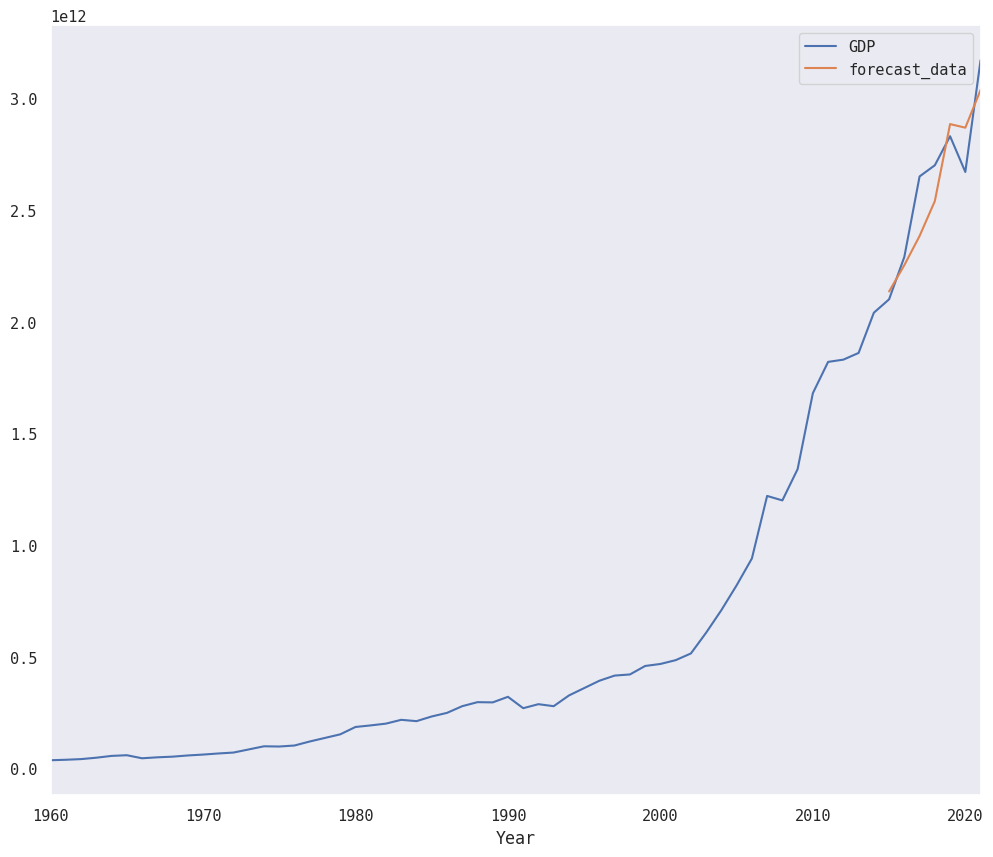

In [9]:
df['forecast_data'] = ARIMAresult.predict(start = '2015-01-01' , end= '2100-01-01', dynamic= True)
df[['GDP','forecast_data']].plot (figsize= (12,10))

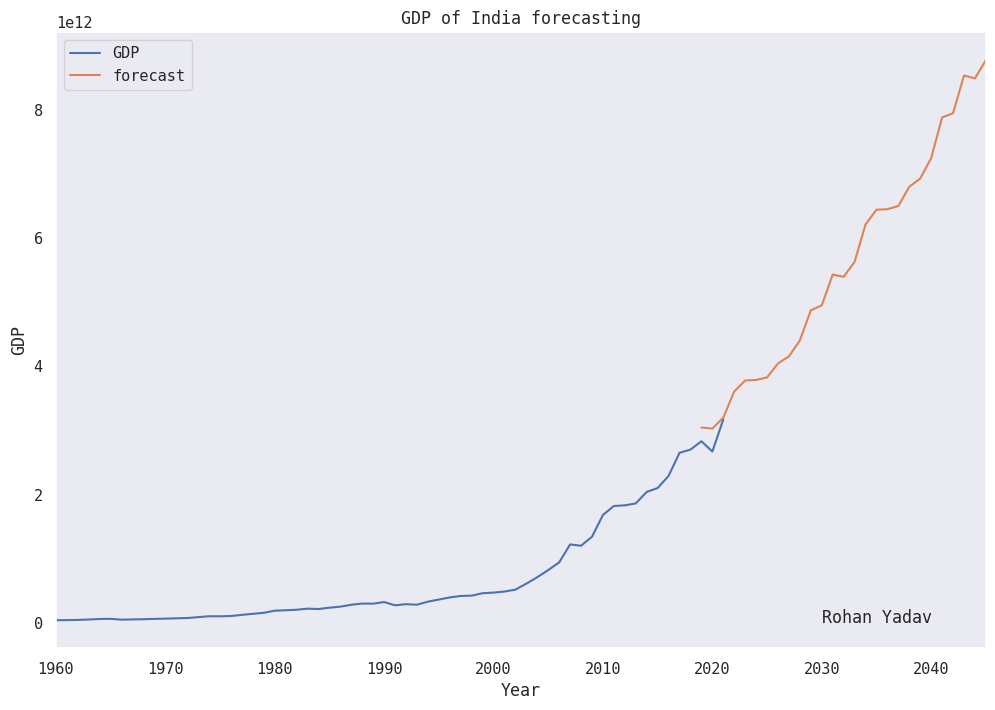

In [12]:
from pandas.tseries.offsets import DateOffset 
future_dates=[df.index[-1]+ DateOffset(years=x) for x in range(0,25)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = ARIMAresult.predict(start = '2019-01-01', end = '2100-01-01', dynamic= True)
future_df[['GDP', 'forecast']].plot(figsize=(12, 8)).set(title = 'GDP of India forecasting')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.text("2030",0,"Rohan Yadav")
plt.savefig('GDPforcast.png', dpi=300, bbox_inches='tight')
plt.show()